In [1]:
import h5py
import numpy as  np
from pathlib import Path
import matplotlib.pyplot as plt
from source import helper
import matplotlib.image
import random
import datetime
import os
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["image.interpolation"] = 'none'

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Conv2D, BatchNormalization
from tensorflow.keras.layers import Activation, MaxPool2D, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split


In [3]:
X = np.load('data/position/X1.npy')
X.shape

(88692, 6, 50, 10)

In [4]:
Y = np.load('data/position/Y1.npy')
Y.shape

(88692,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
X_train  = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test = np.array(y_test)

In [7]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [8]:
X_test.shape

(29269, 6, 50, 10, 1)

In [13]:
input = Input((6,50, 10, 1))
x = Conv2D(8, (3,3))(input)
x = BatchNormalization()(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 46, 6, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 44, 4, 16)      2320  

In [9]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [10]:
%load_ext tensorboard

In [11]:
# tensorboard --logdir data/logs/fit

In [19]:
checkpoint_path = "/data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_softmax60")+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

In [20]:
log_dir = "/data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_softmax60")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [21]:
with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

Epoch 1/60
1857/1857 [==============================] - ETA: 0s - loss: 3.4308 - accuracy: 0.1459
Epoch 1: saving model to ../data/weights/20230730-144327_softmax60\cp-0001.ckpt
1857/1857 [==============================] - 45s 12ms/step - loss: 3.4308 - accuracy: 0.1459 - val_loss: 2.5081 - val_accuracy: 0.3701
Epoch 2/60
1856/1857 [============================>.] - ETA: 0s - loss: 2.5781 - accuracy: 0.3199
Epoch 2: saving model to ../data/weights/20230730-144327_softmax60\cp-0002.ckpt
1857/1857 [==============================] - 23s 13ms/step - loss: 2.5780 - accuracy: 0.3200 - val_loss: 1.8871 - val_accuracy: 0.5421
Epoch 3/60
1856/1857 [============================>.] - ETA: 0s - loss: 2.1803 - accuracy: 0.4198
Epoch 3: saving model to ../data/weights/20230730-144327_softmax60\cp-0003.ckpt
1857/1857 [==============================] - 22s 12ms/step - loss: 2.1804 - accuracy: 0.4197 - val_loss: 1.5607 - val_accuracy: 0.5963
Epoch 4/60
1852/1857 [============================>.] - ETA: 

KeyboardInterrupt: 

In [24]:
model.save('data/models/60e_softmax.h5')

In [12]:
model_name = 'model_2'

input = Input((6,50, 10, 1))
x = Conv2D(8, (3,3))(input)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 6, 48, 8, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 16)      1168      
                                                                 
 activation_1 (Activation)   (None, 6, 46, 6, 16)      0         
                                                             

In [13]:
model.save('data/models/' + model_name + '.h5')

In [12]:
model_name = 'model_3'

input = Input((6,50, 10, 1))
x = Conv2D(8, (3,3))(input)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dense(64, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

model.save('data/models/' + model_name + '.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 6, 48, 8, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 46, 6, 16)     64        
 hNormalization)                                             

KeyboardInterrupt: 

In [13]:
model.save('data/models/' + model_name + '.h5')

In [11]:
model_name = 'model_4'

input = Input((6,50, 10, 1))
x = Conv2D(16, (3,3))(input)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(32, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(8, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dense(64, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

model.save('data/models/' + model_name + '.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 6, 48, 8, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 46, 6, 32)     128       
 hNormalization)                                             

KeyboardInterrupt: 

In [12]:
model.save('data/models/' + model_name + '.h5')

In [14]:
model_name = 'model_5'

input = Input((6,50, 10, 1))
x = Conv2D(16, (3,3))(input)
x = BatchNormalization()(x)
# x = Activation("relu")(x)
x = Conv2D(32, (3,3))(x)
x = BatchNormalization()(x)
# x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
# x = Activation("relu")(x)
x = Conv2D(8, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(64, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

model.save('data/models/' + model_name + '.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 46, 6, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 44, 4, 16)      4624  

KeyboardInterrupt: 

In [15]:
model.save('data/models/' + model_name + '.h5')

In [11]:
model_name = 'model_6'

input = Input((6,50, 10, 1))
x = Conv2D(16, (3,3))(input)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(32, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(8, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(64, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

model.save('data/models/' + model_name + '.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 6, 48, 8, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 46, 6, 32)     128       
 hNormalization)                                             

KeyboardInterrupt: 

In [11]:
model_name = 'model_7'
input = Input((6,50, 10, 1))
x = Conv2D(8, (3,3))(input)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(16, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(32, (3,3))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.4)(x)
x = Dense(51, activation = "softmax")(x)
model = tf.keras.models.Model(input, x)

model.compile(
  loss = "sparse_categorical_crossentropy",
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-6),
  metrics = ["accuracy"]
)
model.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

model.save('data/models/' + model_name + '.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 6, 48, 8, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 46, 6, 16)     64        
 hNormalization)                                             

In [12]:
model2 = tf.keras.models.load_model('data/models/model_2.h5')

In [13]:
model_name = 'model_8'

model2.summary()


checkpoint_path = "data/weights/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,save_freq='epoch')

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S_"+model_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/gpu:0'):
    model2.fit(X_train, y_train, batch_size = 32, epochs = 60,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback,cp_callback])

model2.save('data/models/' + model_name + '.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 50, 10, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 6, 48, 8, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 6, 48, 8, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 6, 48, 8, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 46, 6, 16)      1168      
                                                                 
 activation_1 (Activation)   (None, 6, 46, 6, 16)      0         
                                                             

In [14]:
model = model2

In [15]:
H5_FILENAME = 'final_dataset'
loaded_file = h5py.File('data/'+ H5_FILENAME + '.h5','r')

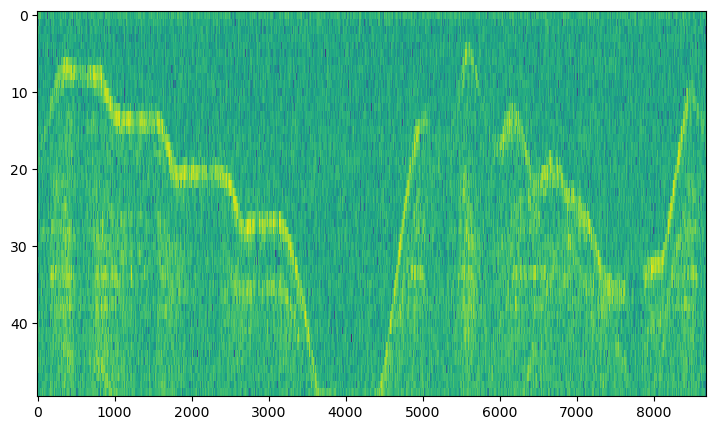

In [20]:
background = loaded_file['background']
distances = [1,2,5,10,20,50]
skip = 10
max_depth = 50

frames = loaded_file['kuba']
frames = helper.subtract_background(background, frames)
spects,y = helper.gen_n_diff_spect(frames, distances=distances)
spects = np.array(spects)
spects = spects[:,:50,:]
plt.imshow(spects[0], aspect=100)

In [34]:
test_set=[]
back = 10
spects = np.array(spects)

normalized_spects = [helper.normalize(s) for s in spects]
normalized_spects = np.array(normalized_spects)

for i in range(spects.shape[-1]-back):
    window = normalized_spects[:,:,i:i+back]
    test_set.append(window)

test_set = np.array(test_set)
test_set  = np.expand_dims(test_set, axis=-1)
pred = model2.predict(test_set)

pred11 = helper.get_argmaxed_spectrogram(pred.T)

271/271 [==============================] - 1s 3ms/step


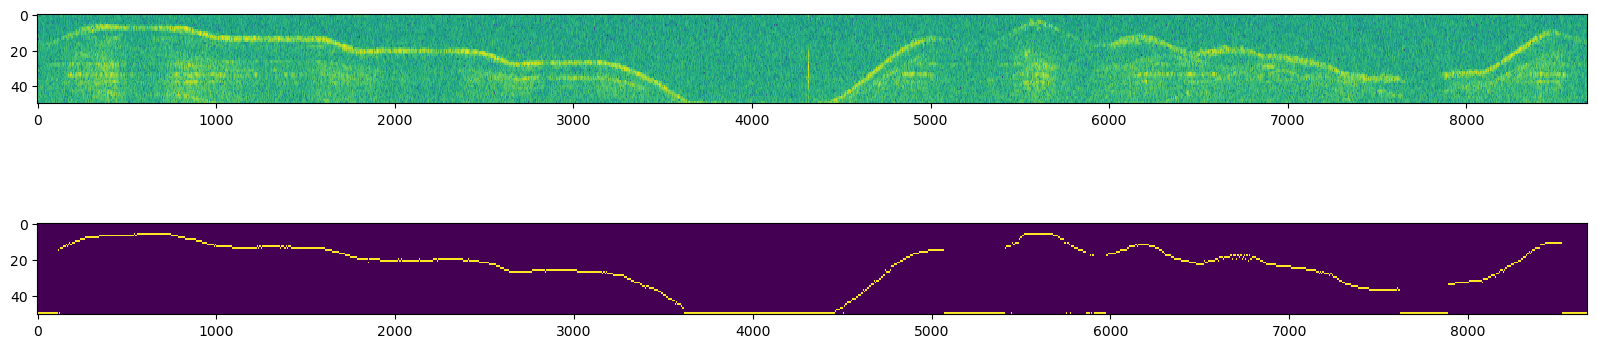

In [36]:
f, axarr = plt.subplots(2,1)
axarr[0].imshow(spects[0], aspect=10)
axarr[1].imshow(pred11,  aspect =10 )

48/48 [==============================] - 0s 6ms/step


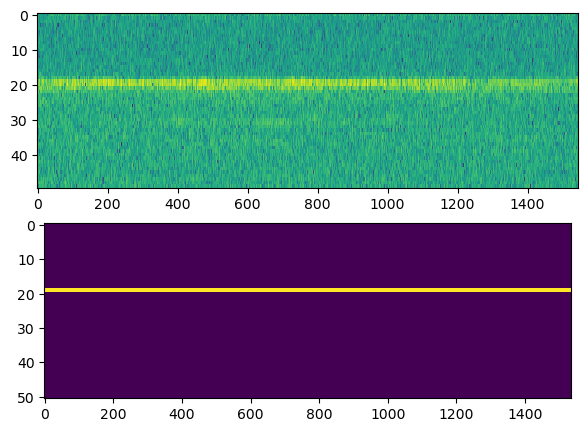

In [43]:
background = loaded_file['background']
distances = [1,2,5,10,20,50]
skip = 10
max_depth = 50

frames = loaded_file['wiatrak_foliarz_3m']
frames = helper.subtract_background(background, frames)
spects,y = helper.gen_n_diff_spect(frames, distances=distances)
spects = np.array(spects)
spects = spects[:,:50,:]


test_set=[]
back = 10
spects = np.array(spects)

normalized_spects = [helper.normalize(s) for s in spects]
normalized_spects = np.array(normalized_spects)

for i in range(spects.shape[-1]-back):
    window = normalized_spects[:,:,i:i+back]
    test_set.append(window)

test_set = np.array(test_set)
test_set  = np.expand_dims(test_set, axis=-1)
pred = model2.predict(test_set)

pred11 = helper.get_argmaxed_spectrogram(pred.T)

f, axarr = plt.subplots(2,1)
axarr[0].imshow(spects[0], aspect=10)
axarr[1].imshow(pred11,  aspect =10 )